In [1]:
#import all the necessary Tools

import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
#import dataset
coffee_raw_data = pd.read_csv(r'D:\Capstone Project 2\coffee.csv')
coffee_raw_data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [3]:
#check shape
coffee_raw_data.shape

(5674, 7)

In [4]:
#check the structure of the data
coffee_raw_data.describe()

,Open,High,Low,Close,Volume
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,126.049677,127.606355,124.587742,125.992233,8749.680472
std,49.699820,50.268900,48.999397,49.624084,9593.583236
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.500000,99.700000,97.362500,98.350000,61.000000
50%,119.850000,121.100000,118.525000,119.825000,6945.500000
75%,143.000000,144.300000,141.237500,142.750000,14425.250000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [5]:
#make a copy 
coffee_data = coffee_raw_data.copy(deep=True)

In [6]:
#convert Date column to datetime  type
coffee_data['Date'] = coffee_data['Date'].apply(lambda x : pd.to_datetime(x))
coffee_data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [8]:
# summary of the data 
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5674 non-null   datetime64[ns]
 1   Open      5674 non-null   float64       
 2   High      5674 non-null   float64       
 3   Low       5674 non-null   float64       
 4   Close     5674 non-null   float64       
 5   Volume    5674 non-null   int64         
 6   Currency  5674 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 310.4+ KB


In [10]:
#check the upper and lower limit of the date
coffee_data['Date'].min(), coffee_data['Date'].max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2022-05-20 00:00:00'))

In [12]:
#drop the redundant columns

cols = ['Volume','Open','High','Low','Currency']
coffee_data_1 = coffee_data.drop(cols, axis=1)
coffee_data_1 = coffee_data_1.sort_values('Date')

In [13]:
coffee_data_1.head()

,Date,Close
0,2000-01-03,116.50
1,2000-01-04,116.25
2,2000-01-05,118.60
3,2000-01-06,116.85
4,2000-01-07,114.15


In [16]:
#check the null values
coffee_data_1.isnull().sum()

Date     0
Close    0
dtype: int64

In [20]:
#check new data set. Rename the column for better understaning
coffee_data_1=coffee_data_1.rename(columns={'Close':'Closing Price'})
coffee_data_1.head()

,Date,Closing Price
0,2000-01-03,116.50
1,2000-01-04,116.25
2,2000-01-05,118.60
3,2000-01-06,116.85
4,2000-01-07,114.15


In [21]:
#Group the dataframe by date, sum of closing price column, then reset index
coffee_data_1 = coffee_data_1.groupby('Date')['Closing Price'].sum().reset_index()

In [22]:
#set Date as Index

coffee_data_1['Date'] = pd.to_datetime(coffee_data_1['Date'])
coffee_data_1.set_index('Date', inplace=True)
coffee_data_1.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=5674, freq=None)

In [24]:
coffee_data_1.head()

,Closing Price
Date,
2000-01-03,116.50
2000-01-04,116.25
2000-01-05,118.60
2000-01-06,116.85
2000-01-07,114.15


Text(0.5, 0, 'Year')

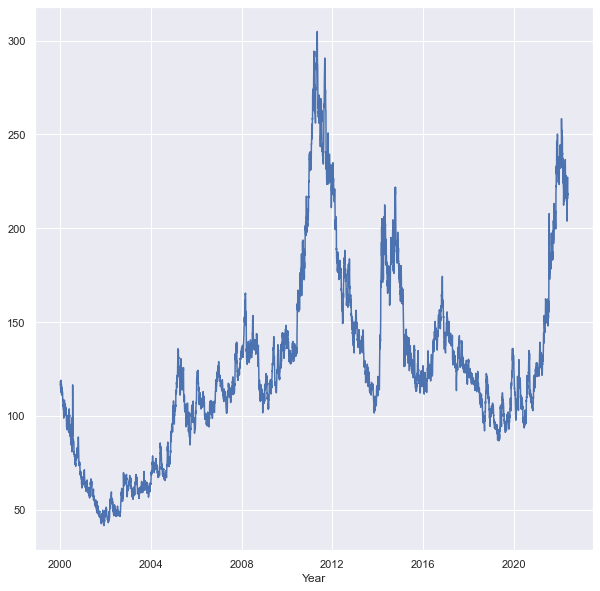

In [56]:
#plotting for 5 years of data

fig = plt.figure(figsize=(10,10))
plt.plot(coffee_data_1)
plt.xlabel("Year")

Upward Trend found during 2008-2010. Another upward trend started from 2020 which might have been caused by Covid 19 Pandemic

In [28]:

data = coffee_data_1['Closing Price'].resample('MS').mean()
data.head()

Date
2000-01-01    115.185000
2000-02-01    106.477500
2000-03-01    104.636957
2000-04-01     96.539474
2000-05-01     96.934091
Freq: MS, Name: Closing Price, dtype: float64

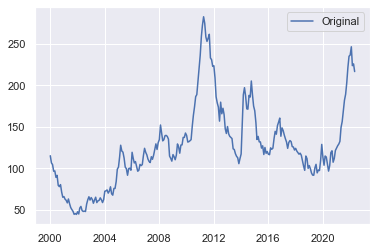

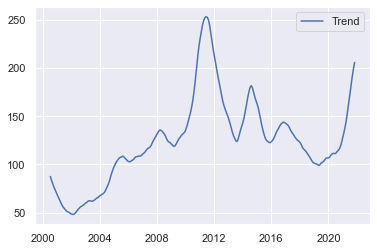

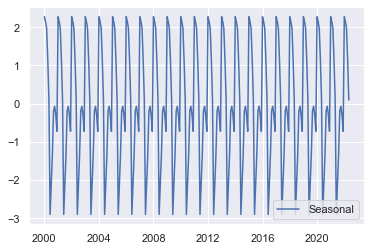

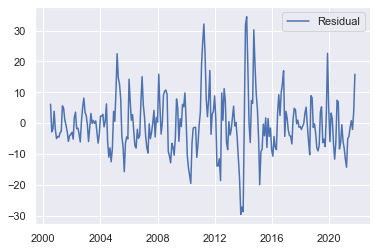

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [30]:
#import ADF package
from statsmodels.tsa.stattools import adfuller

In [31]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Our Null hypothesis is to check if series is stationary. We Will reject Null Hypothesis for test statistic value less than critical value.

Alternative hypothesis is to test if series is non stationary



In [32]:
#adf test on series

adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -1.732774
p-value                          0.414310
#Lags Used                       2.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64


Since test statistic > Null Value, we will Accept null hypothesis(series is not stationary)

# KPSS TEST

In [54]:
#import KPSS module and test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [34]:
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.643140
p-value                   0.018715
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Test Statistic> Critical value, hence we will again accept null hypothesis (series is not stationary)

since both tests conclude that series is noy stationary, we should make it stationary

## Decomposing

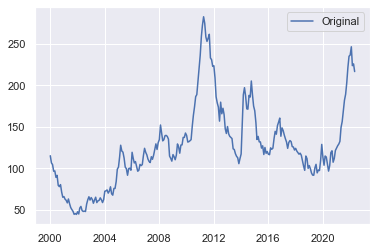

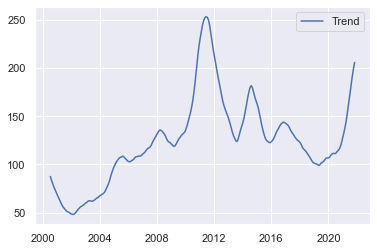

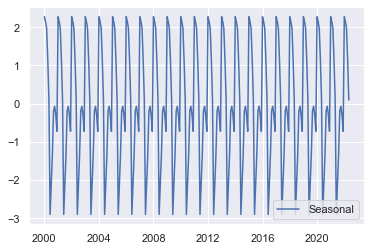

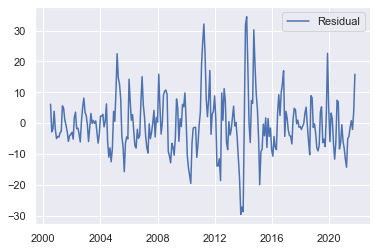

In [36]:
#FOr better understanding, decoposing time series into three components: trends, seasonality and noise

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

Decomposed components suggest that coffee price is unstable

## ARIMA Forecasting

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
#splitting data into train and test sets
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]

In [39]:
test.head()

Date
2021-04-01    132.471429
2021-05-01    149.240000
2021-06-01    156.293182
2021-07-01    169.316667
2021-08-01    181.922727
Freq: MS, Name: Closing Price, dtype: float64

In [40]:
#grid search to find the Optimal set of parameters

from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3195.926031286601
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2819.394869810796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2493.067523938838
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2348.275096688525
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2501.2158161295292
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2469.2865692090218
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2371.646345037486
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2349.9623956370788
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2857.4598088346665
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2509.3905243764657
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2234.7165507842215
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2102.2712311109995
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2250.8838345491326
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2211.2101945052127
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2136.648773017928
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2104.2294054175736
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1827.9319637844872
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1744.273959805966

C:\Users\hchas\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1759.7194089308405
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1945.9987952960976
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1706.539336781077
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1753.8313432463822
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1754.534017792246
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1789.3316971596325
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1706.2229032118858
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1823.65187631809


C:\Users\hchas\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1747.495497947289
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1924.5843326037734
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1693.4612535233705
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1749.0572940821153
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1743.4333410995139
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1781.756441470866
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1695.0588763947712
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1820.8624065150461
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1738.9296208158821
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1931.437257949755
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1693.0447544076846
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1739.823079573283
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1740.7118670107757
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1776.9782833731801
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1695.0509145135527
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1815.2374133671576
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1734.1479496180777
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1925.5055612164

In [41]:
#Search minimum value of AIC

min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

In [42]:
#Fitting ARIMA model

mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6348      0.190      3.338      0.001       0.262       1.008
ma.L1         -0.4771      0.214     -2.229      0.026      -0.897      -0.058
ma.S.L12      -1.0000   2226.494     -0.000      1.000   -4364.848    4362.848
sigma2        81.6521   1.82e+05      0.000      1.000   -3.56e+05    3.56e+05


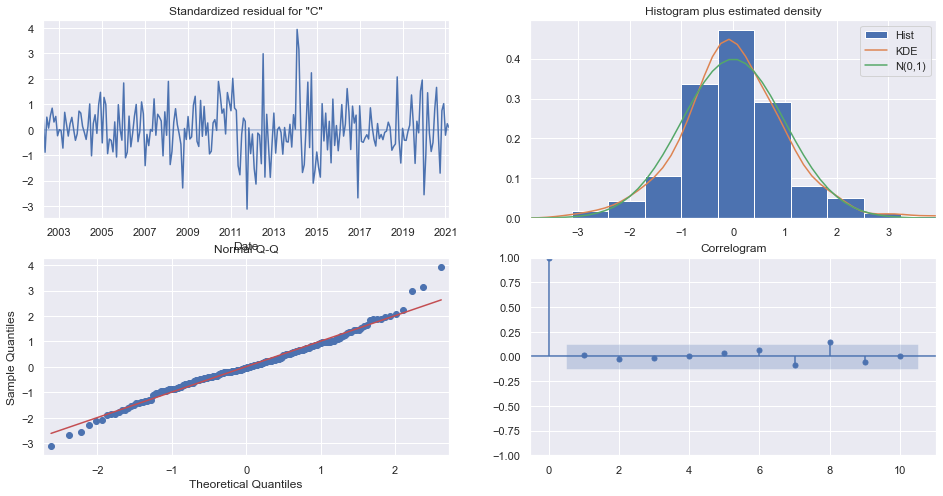

In [43]:
#Model Diagnostics

results.plot_diagnostics(figsize=(16, 8))
plt.show()

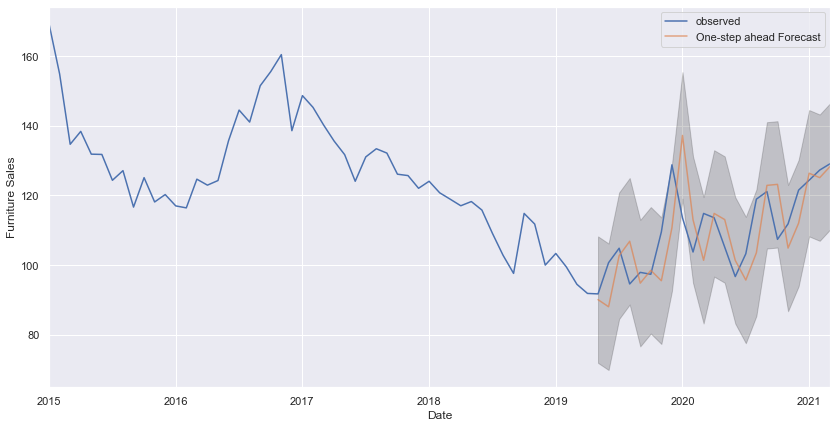

In [49]:
#Forcast testing and visualization

pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()



We can see from the observed and rolling forcast values.Predicted value align with actual values

In [45]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 107.02
The Root Mean Squared Error of our forecasts is 10.35


            lower Closing Price  upper Closing Price
2021-04-01           110.865702           147.121934
2021-05-01           100.478738           155.944205
2021-06-01            89.547778           161.354286
2021-07-01            83.152758           169.473916
2021-08-01            77.424714           176.866894
2021-09-01            72.878345           184.317375
2021-10-01            67.364850           189.872733
2021-11-01            61.608077           194.408329
2021-12-01            57.397761           199.833808
2022-01-01            56.158807           207.670165
2022-02-01            52.062458           212.172888
2022-03-01            48.374670           216.662517
2022-04-01            43.489317           220.074320


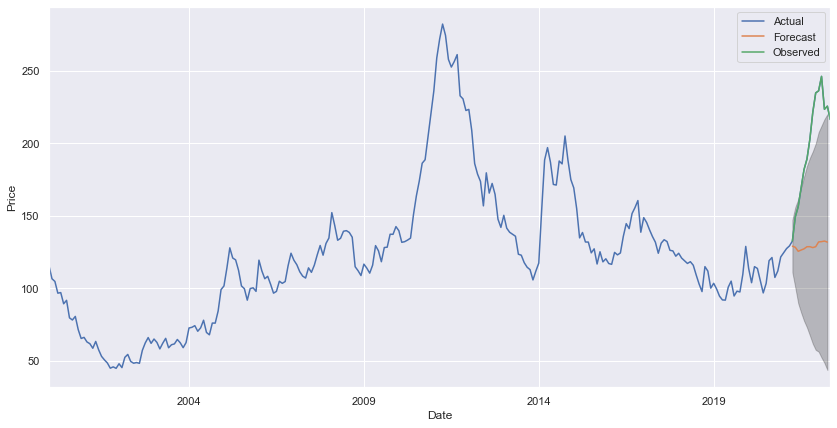

In [50]:
#Visualizing the forecast values

pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

In [52]:
#Comparing actual and predicted values

Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Closing Price']
Result

,Actual,Predicted
Date,,
2021-04-01,132.471429,147.121934
2021-05-01,149.240000,155.944205
2021-06-01,156.293182,161.354286
2021-07-01,169.316667,169.473916
2021-08-01,181.922727,176.866894
2021-09-01,189.107143,184.317375
2021-10-01,202.769048,189.872733
2021-11-01,221.388095,194.408329
2021-12-01,234.800000,199.833808


In [53]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 346.33
The Root Mean Squared Error of our forecasts is 18.61


Conclusion: Coffee Prices remained stable for the most part. Howerver disruptive events like  Covid Pandemic and supply chain issues accross the world caused the prices to rise sharply.